[Reference](https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/hoffm386/eda-with-categorical-variables/master/titanic.csv")

In [3]:
# PassengerId is a dataset artifact, not something useful for analysis
df.drop("PassengerId", axis=1, inplace=True)
# We want to use Age as one of the main examples, drop rows that are missing Age values
df.dropna(subset=["Age"], inplace=True)

# Numeric vs. Categorical EDA

## Multiple Histograms

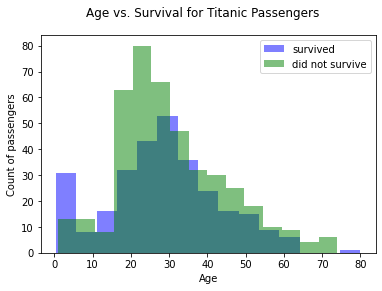

In [4]:
fig, ax = plt.subplots()

ax.hist(df[df["Survived"]==1]["Age"], bins=15, alpha=0.5, color="blue", label="survived")
ax.hist(df[df["Survived"]==0]["Age"], bins=15, alpha=0.5, color="green", label="did not survive")

ax.set_xlabel("Age")
ax.set_ylabel("Count of passengers")

fig.suptitle("Age vs. Survival for Titanic Passengers")

ax.legend();

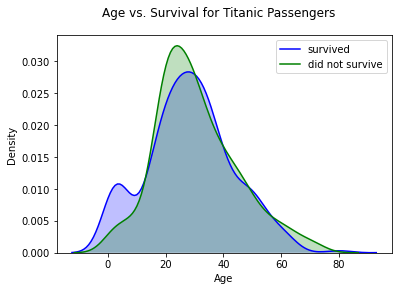

In [6]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Survived"]==1]["Age"], shade=True, color="blue", label="survived", ax=ax)
sns.kdeplot(df[df["Survived"]==0]["Age"], shade=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Survival for Titanic Passengers");

## Multiple Box Plots

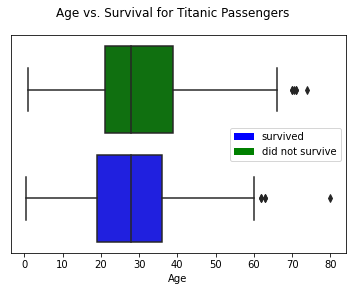

In [7]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Survived", data=df, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Survival for Titanic Passengers")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches);

# Categorical vs. Categorical EDA

## Grouped bar charts

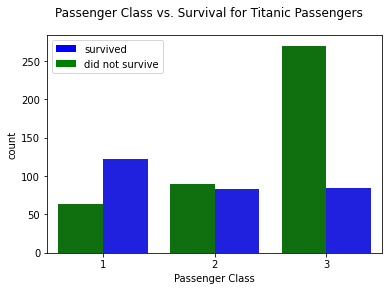

In [11]:
fig, ax = plt.subplots()

sns.countplot("Pclass", hue="Survived", data=df, 
            palette={1:"blue", 0:"green"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need

ax.set_xlabel("Passenger Class")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

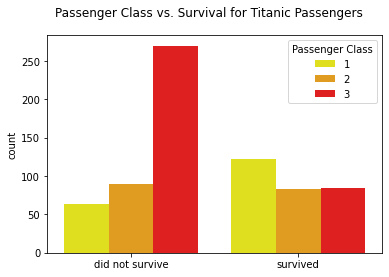

In [13]:
fig, ax = plt.subplots()

sns.countplot("Survived", hue="Pclass", data=df, 
            palette={1:"yellow", 2:"orange", 3:"red"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need

ax.legend(title="Passenger Class")
ax.set_xticklabels(["did not survive", "survived"])
ax.set_xlabel("")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

## Stacked Bar Charts

In [14]:
# Create a dataframe with the counts by passenger class and survival
# ["Name"] could be any column within the data; it is the equivalent
# of COUNT(id) in SQL
counts_df = df.groupby(["Pclass", "Survived"])["Name"].count().unstack()

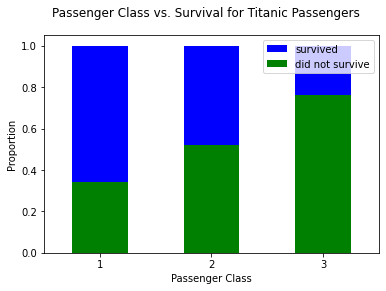

In [17]:
# Transpose so survived + did not survive add up to 1, divide by the total number (transposed), then transpose one more time for plotting
survived_percents_df = counts_df.T.div(counts_df.T.sum()).T

fig, ax = plt.subplots()

survived_percents_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("Passenger Class")
ax.set_xticklabels([1, 2, 3], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

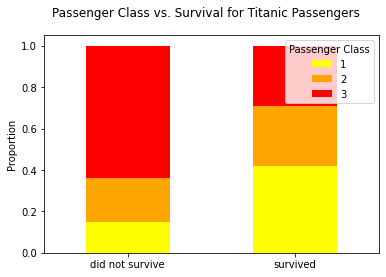

In [19]:
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T

fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red"], ax=ax)

ax.legend(title="Passenger Class")
ax.set_xticklabels(["did not survive", "survived"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

# Numeric vs. Numeric vs. Categorical EDA

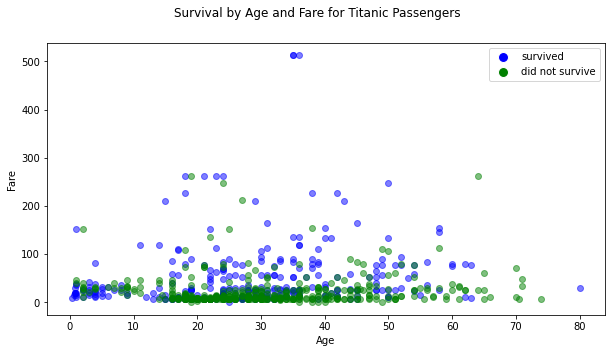

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["Survived"]==1]["Age"], df[df["Survived"]==1]["Fare"], c="blue", alpha=0.5)
ax.scatter(df[df["Survived"]==0]["Age"], df[df["Survived"]==0]["Fare"], c="green", alpha=0.5)

ax.set_xlabel("Age")
ax.set_ylabel("Fare")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='survived', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='did not survive', markerfacecolor='g', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Survival by Age and Fare for Titanic Passengers");